### Multiple Linear Regression -Economics Dataset

In [11]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [13]:
df.drop(columns=["Unnamed: 0","year","month"],inplace=True,axis=1)

In [14]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [16]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


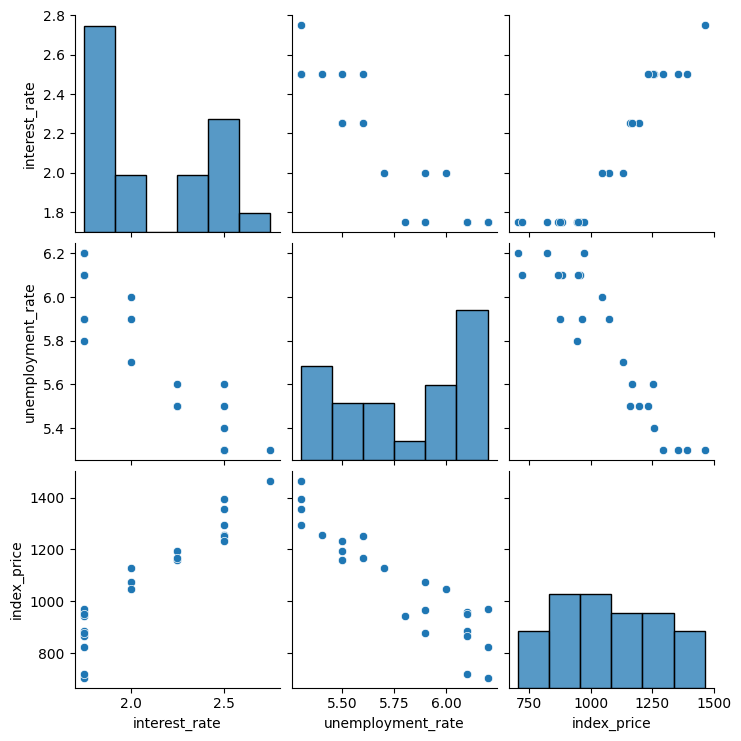

In [18]:
sns.pairplot(df)

In [19]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

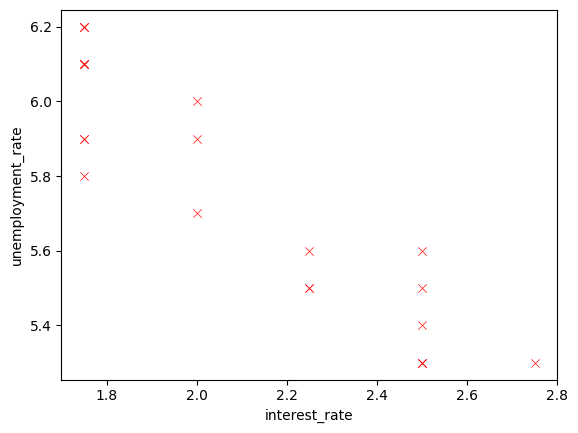

In [22]:
sns.scatterplot(x="interest_rate",y="unemployment_rate",data=df,color="red",marker="x")

In [25]:
# Independent and Dependent Features
X=df[['interest_rate','unemployment_rate']]
Y=df['index_price']

In [26]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [27]:
print(Y)

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64


In [28]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

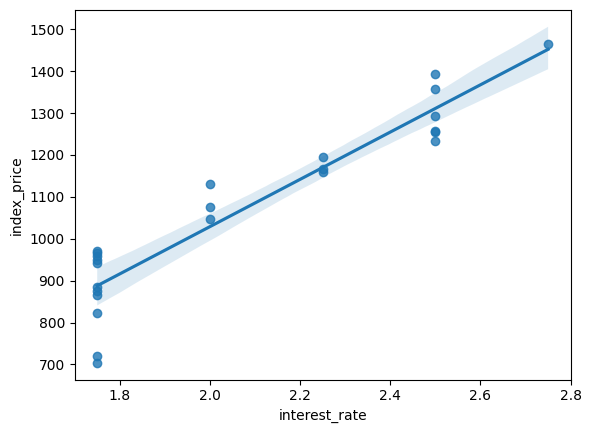

In [29]:
# For Taking an Idea of the regression line - Shaded Region shows that we can hyperparameter tune the model
sns.regplot(x="interest_rate",y="index_price",data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

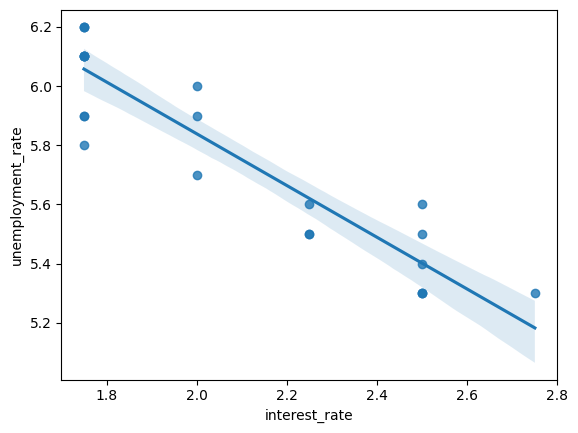

In [30]:
sns.regplot(x="interest_rate",y="unemployment_rate",data=df)

In [31]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [32]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [34]:
print(X_train)

[[-0.90115511  0.37908503]
 [ 1.31077107 -1.48187786]
 [-0.90115511  1.30956648]
 [ 1.31077107 -0.55139641]
 [ 1.31077107 -1.48187786]
 [-0.16384638  0.68924552]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -1.48187786]
 [ 1.31077107 -1.17171738]
 [-0.90115511  1.30956648]
 [-0.90115511  0.999406  ]
 [-0.90115511  0.37908503]
 [-0.90115511  0.999406  ]
 [ 0.57346234 -0.8615569 ]
 [-0.16384638 -0.24123593]
 [-0.90115511  0.06892455]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -0.8615569 ]]


In [36]:
# Linear Regression`
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [40]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X_train,Y_train,scoring="neg_mean_squared_error",cv=3) 

In [41]:
np.mean(score)

-5914.828180162386

In [42]:
y_pred=lr.predict(X_test)

In [43]:
print(y_pred)

[1204.22770398  821.65051903 1406.51300368  857.70889608  994.90992298
 1168.16932693]


In [44]:
# Performance Metrics
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error
print(mean_squared_error(Y_test,y_pred))
print(mean_absolute_error(Y_test,y_pred))
print(np.sqrt(mean_squared_error(Y_test,y_pred)))



5793.762887712569
59.935781523235484
76.11677139574805


In [45]:
# R Square
from sklearn.metrics import r2_score
r2=r2_score(Y_test,y_pred)
print(r2)


0.8278978091457145


In [46]:
# Adjusted R Square
1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7131630152428576

### Assumptions


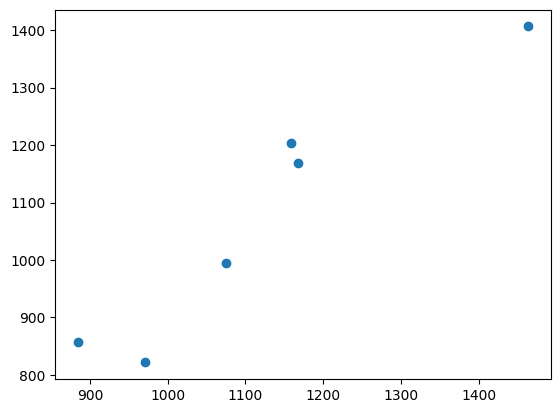

In [47]:
plt.scatter(Y_test,y_pred)

In [48]:
residuals=Y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


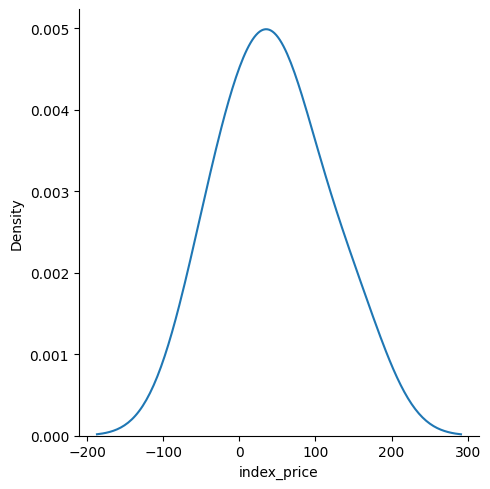

In [51]:
sns.displot(residuals,kind="kde")

As we are getting a Normal Curve so the model we have created is good

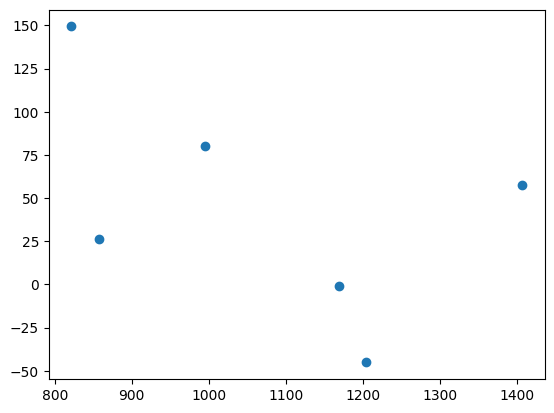

In [56]:
# scatter plot wrt residuals and y_pred
plt.scatter(y_pred,residuals)

### Using OLS

In [57]:
import statsmodels.api as sm



In [58]:
model=sm.OLS(Y_train,X_train).fit()

In [59]:
prediction=model.predict(X_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [60]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 12 Aug 2024   Prob (F-statistic):                       0.754
Time:                        20:48:46   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\SaadS\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [61]:
print(lr.coef_)

[  88.27275507 -116.25716066]


In [62]:
print(lr.intercept_)

1053.4444444444443
